# Lab 5: Neural Network to recognize hand-written 0 vs 1 (classification)

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from lib.autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Load data

The data set contains 1000 training examples of handwritten digits, here limited to zero and one.

* Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
* Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
* The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
* Each training example becomes a single row in our data matrix X.
* This gives us a 1000 x 400 matrix X where every row is a training example of a handwritten digit image.

The second part of the training set is a 1000 x 1 dimensional vector y that contains labels for the training set: y = 0 if the image is of the digit 0, y = 1 if the image is of the digit 1.

In [5]:
# load dataset
X, y = load_data()

In [6]:
# check the dimensions of the data
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


In [9]:
# explore the data
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

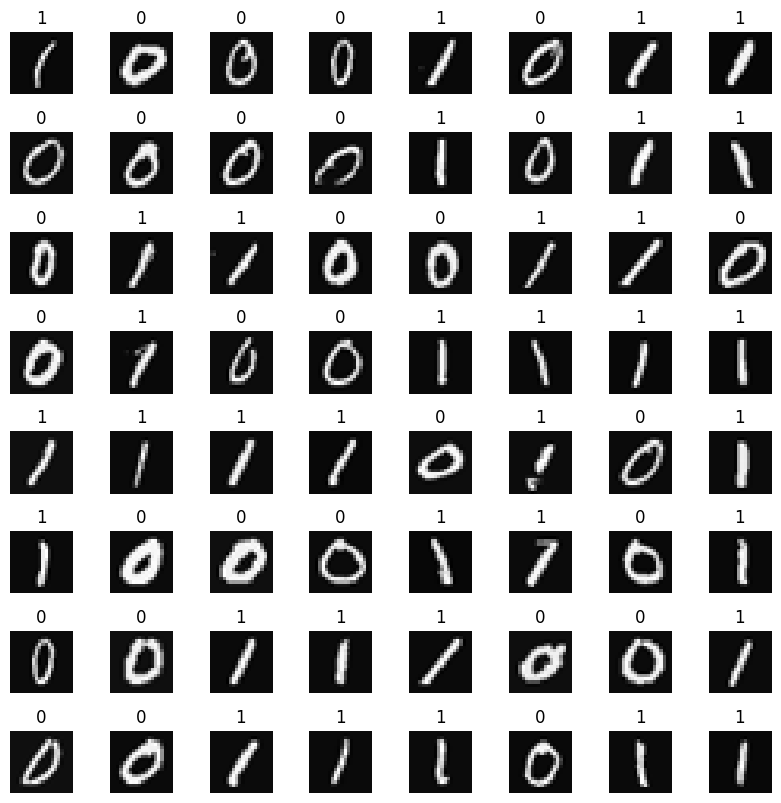

In [10]:
# visualize the data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

## Develop parameters

Neural network characteristics:
* layer 1: 25 units
* layer 2: 15 units
* layer 3: 1 unit

Recall that the dimensions of these parameters are determined as follows:
* If network has s in-units in a layer and t out-units in the next layer, then...
    * W will be of dimensions s x t
    * B will be of dimensions 1 x t (1D vector in NumPy, 2D matrix in Tensorflow)

Therefore, the shapes of W, and B, are:
* layer1: The shape of W1 is (400, 25) and the NumPy shape of b1 is (25,)
* layer2: The shape of W2 is (25, 15) and the NumPy shape of b2 is: (15,)
* layer3: The shape of W3 is (15, 1) and the NumPy shape of b3 is: (1,)

## Tensorflow implementation

Tensorflow models are built layer by layer. 

A layer's input dimensions (s above) are calculated for you. 

You specify a layer's output dimensions and this determines the next layer's input dimension. 

The input dimension of the first layer is derived from the size of the input data specified in the model.fit statement below.

### Structure the network

In [19]:
# UNQ_C1
# GRADED CELL: Sequential model

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ### 

        # We do NOT have to specify input_dim within each layer because we already specified the original input size (the input to layer1) in the line above.
        # The inputs to the subsequent layers are known... they will be the number of units from the previous layer
        # This passed the tests in the lab!
        Dense(25, activation = 'sigmoid', name='layer1'),
        Dense(15, activation = 'sigmoid', name='layer2'),
        Dense(1, activation = 'sigmoid', name='layer3')

        # # Must specify input dimension; 400 features in the original input to layer 1; 25 features come out of layer 1 and are inputs to layer 2 and so on...
        # Dense(25, input_dim=400, activation = 'sigmoid', name='layer1'),
        # Dense(15, input_dim=25, activation = 'sigmoid', name='layer2'),
        # Dense(1, input_dim=15, activation = 'sigmoid', name='layer3')
        
        ### END CODE HERE ### 
    ], name = "my_model" 
) 

In [21]:
model.summary()

# expected ouput:
# layer1    (None, 25)       10, 025
# layer2    (None, 15)       390
# layer3    (None, 1)        16

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


In [26]:
# Examine details of the model by extracting each layer
[layer1, layer2, layer3] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

# expected output
# W1 shape = (400, 25), b1 shape = (25,)  
# W2 shape = (25, 15), b2 shape = (15,)  
# W3 shape = (15, 1), b3 shape = (1,)

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [27]:
# Alternative way to view details of the layers
print(model.layers[2].weights)

[<Variable path=my_model/layer3/kernel, shape=(15, 1), dtype=float32, value=[[ 0.48173517]
 [-0.5271882 ]
 [-0.5282045 ]
 [ 0.36394846]
 [-0.06324512]
 [-0.13715711]
 [ 0.29431123]
 [-0.09972423]
 [ 0.49532408]
 [-0.41005585]
 [ 0.42162555]
 [ 0.5070539 ]
 [ 0.11780918]
 [ 0.17518538]
 [-0.5393438 ]]>, <Variable path=my_model/layer3/bias, shape=(1,), dtype=float32, value=[0.]>]


### Define a loss function and run gradient descent to fit the weights of the model to the training data

The content here will be explained more in the following week.

In [28]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.6657
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.5037
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.3397
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.2228
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.1544
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.1194
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.0885
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.0747
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.0585
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.0525
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.0451
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.0380
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.0351
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.0302
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - lo

### Make predictions

In [32]:
# numeric predictions

prediction1 = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")

prediction2 = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
 predicting a zero: [[0.98832357]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
 predicting a one:  [[0.98832357]]


In [34]:
# transform to binary predictions (1 or 0)

if prediction1 >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction1 after threshold: {yhat}... should be zero")

if prediction2 >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction2 after threshold: {yhat}... should be one")

prediction1 after threshold: 0... should be zero
prediction2 after threshold: 1... should be one


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

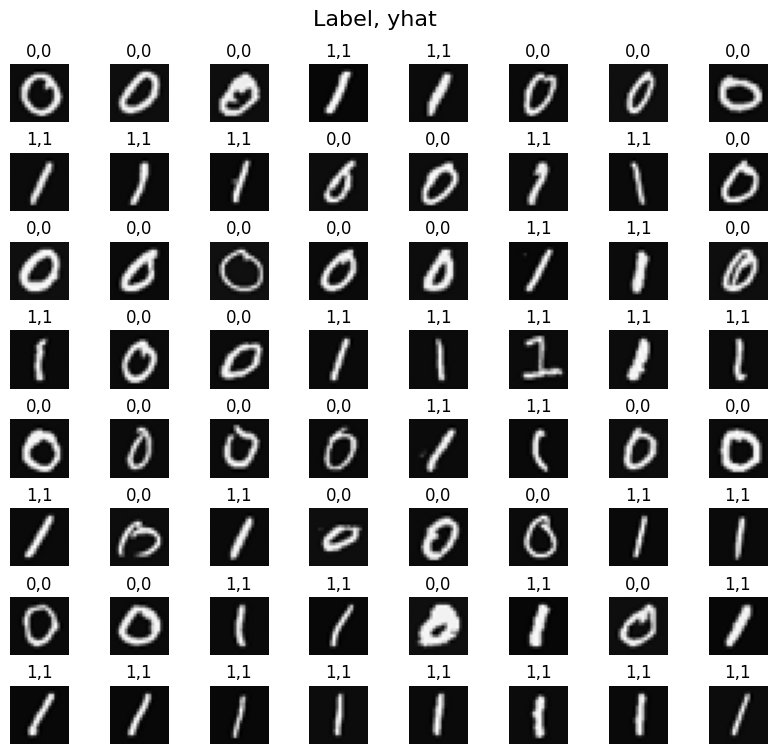

In [65]:
# Compare predictions to labels for a random sample of 64 digits
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

## NumPy implementation (more manual)

### Define a function to process each layer

In [39]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
### START CODE HERE ### 

    # each loop represents one unit/function of the layer
    for j in range(units):
        
        w = W[:,j] # accesses the jth column of the weights matrix... the weights for the unit j
        
        z = np.dot(w, a_in) + b[j]  # analogous to f(x) = wx + b
        
        a_out[j] = g(z) # sigmoid because doing classification; in this lab g was passed in as a parameter
        
        
### END CODE HERE ### 
    return(a_out)

# The above passed tests!

In [40]:
# Quick Check

x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

# expected output
# [0.54735762 0.57932425 0.61063923]

[0.54735762 0.57932425 0.61063923]


### Define a function to build the network (multiple layers)

In [41]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

In [42]:
# copy the trained weights and biases from the Tensorflow implementation above
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

### Make predictions

In [43]:
# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )

# apply threshold to achieve binary result
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])

prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/var/folders/3b/hnpmysn502s9yzmj7cnm06_r0000gn/T/ipykernel_43127/1015049671.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_yhat = int(my_prediction >= 0.5)
/var/folders/3b/hnpmysn502s9yzmj7cnm06_r0000gn/T/ipykernel_43127/1015049671.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tf_yhat = int(tf_prediction >= 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

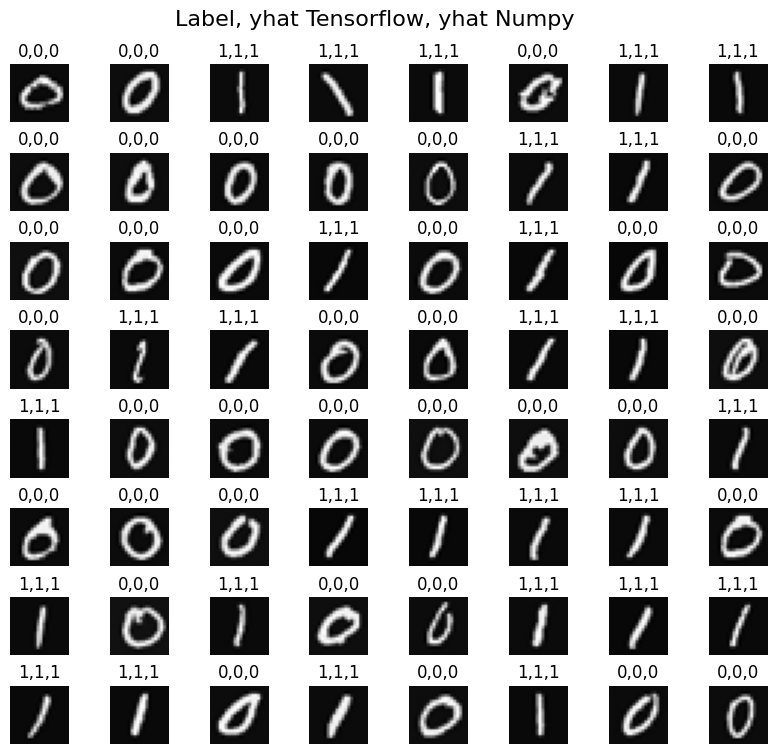

In [64]:
# Compare predictions between Tensorflow and NumPy implementations
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

## Vectorized implementation

### Define a function to process each layer

In [48]:
# UNQ_C3
# UNGRADED FUNCTION: my_dense_v

def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (tf.Tensor or ndarray (m,j)) : m examples, j units
    """
### START CODE HERE ### 
    
    Z = np.matmul(A_in, W) + b  # matmul is a NumPy function that does matrix multiplication 
    
    A_out = g(Z) # function g applied element-wise

### END CODE HERE ### 
    return(A_out)

# Above function passed all tests!

In [49]:
# Check function
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1,3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

# expected output
# [[0.54735762 0.57932425 0.61063923]
 # [0.57199613 0.61301418 0.65248946]
 # [0.5962827  0.64565631 0.6921095 ]
 # [0.62010643 0.67699586 0.72908792]]

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


### Define a function to build the network

In [50]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

In [51]:
# copy the trained weights and biases from the Tensorflow implementation above
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

### Make predictions

In [55]:
# make predictions
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
print(Prediction.shape)

# apply threshold to achieve binary result
Yhat = (Prediction >= 0.5).astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

(1000, 1)
predict a zero:  [0] predict a one:  [1]


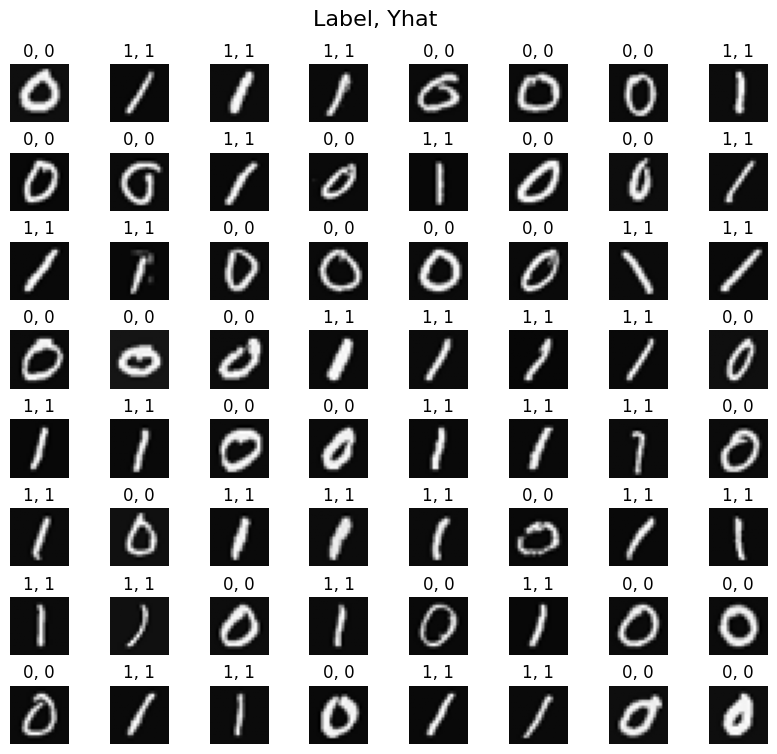

In [58]:
# The below results in 64 correct predictions
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

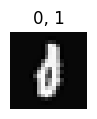

In [59]:
# The below results in 1 incorrect prediction
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()

## Vectorization Tutorial

In [44]:
# Demonstrate vectorization and matrix operations
x = X[0].reshape(-1,1)         # column vector (400,1)
z1 = np.matmul(x.T,W1) + b1    # (1,400)(400,25) = (1,25)
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


In [60]:
# Another example
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

(a + b).shape: (3, 1), 
a + b = 
[[6]
 [7]
 [8]]


In [61]:
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a * b).shape: {(a * b).shape}, \na * b = \n{a * b}")

(a * b).shape: (3, 1), 
a * b = 
[[ 5]
 [10]
 [15]]


In [62]:
a = np.array([1,2,3,4]).reshape(-1,1)
b = np.array([1,2,3]).reshape(1,-1)
print(a)
print(b)
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

[[1]
 [2]
 [3]
 [4]]
[[1 2 3]]
(a + b).shape: (4, 3), 
a + b = 
[[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]]
